### SVM

![image](svm_scratch_full.jpg)

In [13]:
import numpy as np
import matplotlib.pyplot as plt

### Linear SVM

In [14]:
def train_svm(       
        points,
        targets, 
        learning_rate = 0.01,
        reg_lambda = 0.01,
        iterations = 10000
):
    w = np.zeros(points.shape[1]) 
    b = 0

    for _ in range(iterations):

        for i, x in enumerate(points):
            # y = w*x - b
            # classifies by sign - / + 
            classification = np.dot(x, w) - b

            # will be true for correctly classified objects
            # this is also the hinge_loss
            # 0 >= 1 - tragets[i] * classification
            evaluation = targets[i] * classification >= 1
    
            if evaluation:
                gradient_w = 2 * reg_lambda * w
                gradient_b = 0
            else:
                gradient_w = 2 * reg_lambda * w - targets[i] * x
                gradient_b = targets[i]

            w -= learning_rate * gradient_w
            b -= learning_rate * gradient_b
        
    return w, b

In [15]:
def classify(x, w, b):
    c = np.dot(x, w) - b
    return -1 if c < 0 else 1

### Test set:

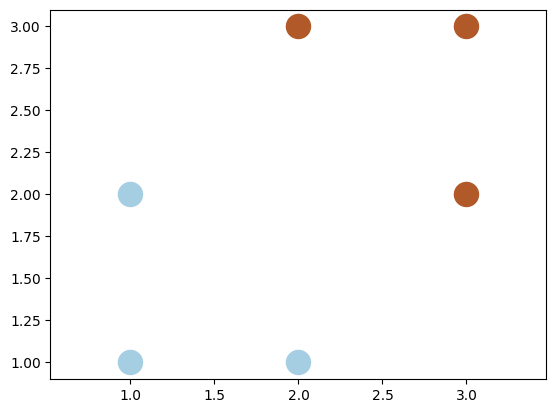

In [16]:

data_1 = np.array([ [1,1], [1,2], [2,1], [2,3], [3,2], [3,3] ])
classes_1 = np.array([ -1, -1, -1, 1, 1, 1])

plt.scatter(
    data_1[:, 0],
    data_1[:, 1],
    c=classes_1,
    cmap=plt.cm.Paired,
    marker="o",
    s=300
)
plt.axis("equal")
plt.show()

### Train linear SVM

In [17]:
w, b = train_svm( data_1, classes_1 )
print(f"Learned boundary: Y = {w} * X - {b}")

Learned boundary: Y = [1.02707642 1.02625046] * X - 4.099999999999957


In [18]:
learned_values = [np.dot(x, w) - b for x in data_1]
print(learned_values)
learned_classes = [classify(x, w, b) for x in data_1]
print(learned_classes)


[-2.0466731237124356, -1.020422664740443, -1.0195967063969067, 1.0329042115470788, 1.0337301698906147, 2.0599806288626077]
[-1, -1, -1, 1, 1, 1]


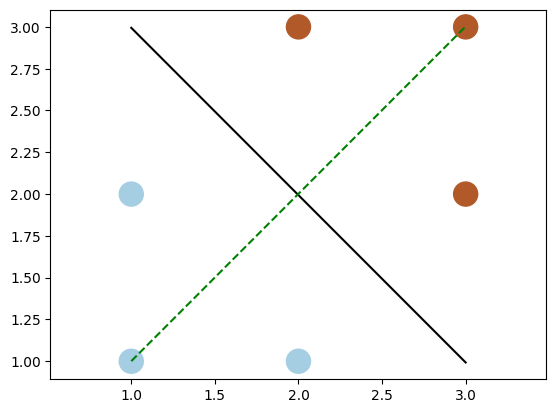

In [19]:

plt.scatter(
    data_1[:, 0],
    data_1[:, 1],
    c=learned_classes,
    cmap=plt.cm.Paired,
    marker="o",
    s=300
)

xmin, xmax = np.min(data_1[:, 0]), np.max(data_1[:, 0])
boundary_x = np.linspace(xmin, xmax, 100)
# we flip the sign on -w[0] to turn the line by 90 degrees
# displaying the boundary, rather than it's normal.
boundary_y = (-w[0] / w[1]) * boundary_x + b / w[1]
plt.plot(boundary_x, boundary_y, color='black')

normal_y = (w[0] / w[1]) * boundary_x
plt.plot(boundary_x, normal_y, color='green', linestyle='--')

plt.axis("equal")
plt.show()

### Kernels
a kernel will modify the input data to artificially inflate the dimension.

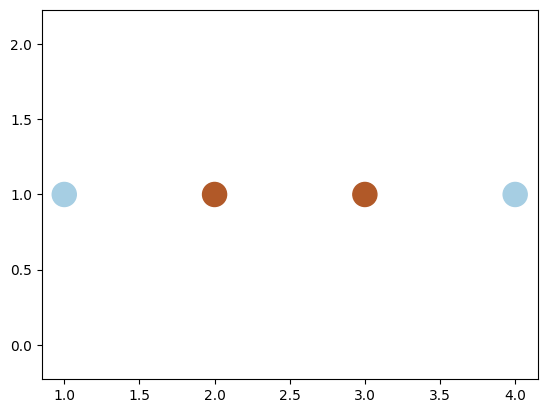

In [20]:
data_flat = np.array([ [1,1], [2,1], [3,1], [4,1]])
classes_flat = np.array([ -1, 1, 1, -1])

plt.scatter(
    data_flat[:, 0],
    data_flat[:, 1],
    c=classes_flat,
    cmap=plt.cm.Paired,
    marker="o",
    s=300
)
plt.axis("equal")
plt.show()

This set will not be learned by the linear model. But we can transform the data to introduce artificial separation

In [21]:
def rbf_kernel(data, gamma = 0.1):

    return np.exp(
        -gamma * np.sum(
            (data - data[:,np.newaxis])**2,
            axis = -1
        )
    )

(4, 4)


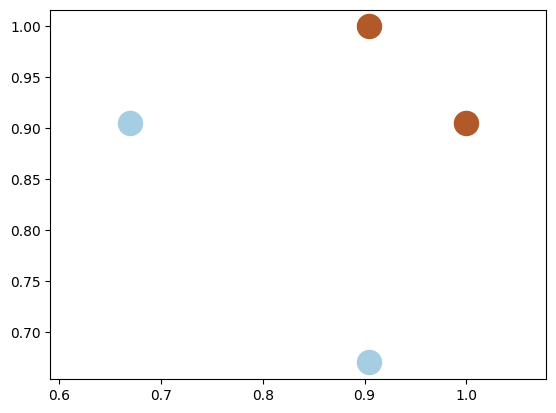

In [41]:
new_data = rbf_kernel(data_flat)
print(new_data.shape)

plt.scatter(
    new_data[:, 1],
    new_data[:, 2],
    c=classes_flat,
    cmap=plt.cm.Paired,
    marker="o",
    s=300
)
plt.axis("equal")
plt.show()

In [23]:
w, b = train_svm( new_data, classes_flat )

learned_values = [np.dot(x, w) - b for x in new_data]
print(learned_values)
learned_classes = [-1 if c < 0 else 1 for c in learned_values]
print(learned_classes)

[-0.4542062245046168, 1.0270798421816565, 0.997601433097957, -0.5285243438765352]
[-1, 1, 1, -1]


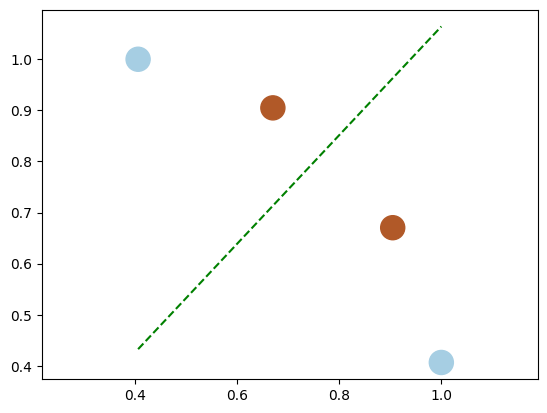

In [53]:
# note - we can choose different projection axis now, since the data has more than 2 dimensions
# dim = 4
# a1, a2 in [0..3]
a1 = 0
a2 = 3

plt.scatter(
    new_data[:, a1],
    new_data[:, a2],
    c=learned_classes,
    cmap=plt.cm.Paired,
    marker="o",
    s=300
)

xmin, xmax = np.min(new_data[:, a1]), np.max(new_data[:, a2])
boundary_x = np.linspace(xmin, xmax, 100)

normal_y = (w[a1] / w[a2]) * boundary_x
plt.plot(boundary_x, normal_y, color='green', linestyle='--')

plt.axis("equal")
plt.show()

### Question: how do we transform new data (single inputs) to run on the learned decider?

(The transofrmation must respect the dimensions set while learning)